In [1]:
import numpy as np
import matplotlib as mpl
# mpl.use('nbAgg')
import matplotlib
import matplotlib.pyplot as plt
import h5py
import py4DSTEM
import scipy.io
import numpy as np
print(py4DSTEM.__version__)
from scipy.io import savemat

D:\anaconda\Lib\site-packages\cupy\_environment.py:487: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


0.14.8


In [35]:
file_data =r'D:\multi_slice\recon_\ground_truth_py\ground_truth_python\multislice_image_generate\dp.h5'

def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print('%s %s' % (key, val))
        
f = h5py.File(file_data,'r')
f.visititems(print_attrs)
data=f['dp_fwd'][:]
print(data.shape)
print(data[1][0][0])
print(data[0][1][0])
print(data[0][0][1])

dp_fwd
(128, 128, 16384)
7.4108272797362095e-06
6.591055831400989e-06
2.608590586326809e-06


In [4]:
#matplotlib inline
plt.imshow(data[:,:,0])
mpl.use('nbAgg')
plt.show()

In [24]:
slice_sum = data[:,:,1].sum()
print(slice_sum)
max_value = data[:,:,1].max()
print(max_value)

240.00000000000085
0.328517450209688


In [36]:
def add_poisson_noise_and_merge(data, dose):
    # 获取数据的形状
    shape = data.shape
    # 计算每个像素的电子数
    pixel_area = 0.3568*0.3568
    electrons_per_pixel = dose * pixel_area
    noisy_data = np.zeros_like(data, dtype=float)
    
    # 对前两个维度的数据进行操作
    for i in range(shape[2]):
        # 获取当前二维数组
        array = data[:,:,i]
        
        # 确保数据为浮点类型以避免数据类型问题
        if array.dtype != np.float32 and array.dtype != np.float64:
            lam = array.astype(np.float64)
        else:
            lam = array
        
        # 缩放数组
        lam = lam * electrons_per_pixel
        
        # 生成泊松噪声图
        noisy_array = np.random.poisson(lam)
        
        # 初始化合并后的数组
        merged_array = np.zeros_like(lam)
        
        # 查找原数组中的非零区域
        non_zero_mask =  noisy_array > 0
        
         # 计算重叠区域（原数组和噪声数组都有非零值的区域）
        overlap_mask = non_zero_mask & (noisy_array > 0)
        
        # 重叠区域像素值取原数组和噪声数组像素值的平均
        merged_array[overlap_mask] = (lam[overlap_mask] + noisy_array[overlap_mask]) / 2.0
        
        # 非重叠区域,直接取噪声数组的像素值
        merged_array[~overlap_mask] = lam[~overlap_mask]
        
        # 将合并后的数据放回原始数组,并进行缩放
        noisy_data[:,:,i] = merged_array
    
    return noisy_data

# 使用示例
data1 = data.copy().astype(float)
noise_data = add_poisson_noise_and_merge(data1, dose=3500.0/240.0)
data = noise_data

print(data[1][0][0])
print(data[0][1][0])
print(data[0][0][1])

1.3758566445642742e-05
1.2236620309750286e-05
4.8429771139846465e-06


In [37]:
slice_sum = data[:,:,1].sum()
print(slice_sum)
max_value = data[:,:,1].max()
print(max_value)

609.2111628116746
1.2880898223640285


In [ ]:
def add_poisson_noise(data, dose=2500/5637.500604824863):
    # 获取数据的形状
    shape = data.shape
    # 计算每个像素的电子数
    pixel_area = 0.193379*0.193379
    electrons_per_pixel = dose * pixel_area
    noisy_data = np.zeros_like(data, dtype=float)
    
    # 对前两个维度的数据进行操作
    for i in range(shape[2]):
        # 获取当前二维数组
        array = data[:,:,i]
        # 缩放数组并添加泊松噪声
        array = array * electrons_per_pixel
        noisy_array = np.random.poisson(array)
        # 将带噪声的数据放回原始数组，并进行缩放
        noisy_data[:,:,i] = noisy_array / electrons_per_pixel
    
    return noisy_data

# 使用示例
data1 = data.copy().astype(float)*2500/5637.500604824863
noise_data = add_poisson_noise(data1)
data = (data1 + noise_data) / 2

file_path = r'C:\Users\wzr\Desktop\dataset_data_500dose.mat'
# 保存数据为.mat文件
savemat(file_path, {'data': data})

print(data[1][0][0])
print(data[0][1][0])
print(data[0][0][1])

In [37]:
data1 = data.copy().astype(float)
print(data1[1][0][0])
print(data[0][1][0])
print(data[0][0][1])

3.71392547214735e-05
2.6000375965316424e-05
2.2329787963672608e-05


In [18]:
file_data =r'C:\Users\wzr\Desktop\dataset_data_500dose.mat'

def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print('%s %s' % (key, val))
        
f = h5py.File(file_data,'r')
f.visititems(print_attrs)
data1=f['dp_fwd'][:]
print(data1[1][0][0])
print(data1[0][1][0])
print(data1[0][0][1])

OSError: Unable to open file (file signature not found)

In [49]:

%data = np.transpose(data, (1, 2, 0))
%print(data[1][0][0])
%print(data[0][1][0])
%print(data[0][0][1])
%print(data.shape)


UsageError: Line magic function `%data` not found.


In [28]:
data = data.reshape(128,128,128,128)
print(data[1][0][0][0])
print(data[0][1][0][0])
print(data[0][0][1][0])
print(data[0][0][0][1])
print(data.shape)
data=np.transpose(data,(2,3,0,1))
print(data[1][0][0][0])
print(data[0][1][0][0])
print(data[0][0][1][0])
print(data[0][0][0][1])
#subset = data[:32, :32, :, :]
dataset = py4DSTEM.DataCube(
    data=data
)
dataset.data=np.flipud(dataset.data)
dataset.data=np.fliplr(dataset.data)
dataset.calibration.set_Q_pixel_size(0.0403997)
dataset.calibration.set_Q_pixel_units('A^-1')
dataset.calibration.set_R_pixel_size(0.3568)
dataset.calibration.set_R_pixel_units('A')
dataset.calibration

0.0
0.0
0.0
0.0
(128, 128, 128, 128)
0.0
0.0
0.0
0.0


Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    0.0403997
             R_pixel_size:    0.3568
             Q_pixel_units:   A^-1
             R_pixel_units:   A
             QR_flip:         False
)

In [13]:
plt.show()

In [6]:
subset = data[:, :, :32, :32]
print(subset.shape)
dataset=subset

(128, 128, 32, 32)


In [20]:
def add_poisson_noise(dataset, dose=500/5637.500604824863):
    # 获取数据的形状
    shape = dataset.data.shape
    
    # 计算每个像素的电子数
    pixel_area = dataset.R_pixel_size
    electrons_per_pixel = dose * pixel_area
    
    # 对前两个维度的数据进行操作
    for i in range(shape[0]):
        for j in range(shape[1]):
            # 获取当前二维数组
            array = dataset.data[i,j,:,:]
            
            # 缩放数组并添加泊松噪声
            array = array * electrons_per_pixel
            noisy_array = np.random.poisson(array).astype(float)
            
            # 将带噪声的数据放回原始数组
            dataset.data[i,j,:,:] = noisy_array
    print(data[1][0][0][0])
    print(data[0][1][0][0])
    print(data[0][0][1][0])
    print(data[0][0][0][1])
    return dataset

# 使用示例
dataset = add_poisson_noise(dataset)
dataset.get_dp_mean();
noisy_image = dataset.data[64, 64, :, :]

# 展示加噪后的二维切片衍射图案
plt.imshow(noisy_image, cmap='gray')
plt.show()
py4DSTEM.show(
    dataset.tree('dp_mean'),
    ticks=False
)
matplotlib.use('TkAgg')
plt.show()

0.0
0.0
0.0
0.0


In [21]:
noisy_image = dataset.data[64, 64, :, :]

# 展示加噪后的二维切片衍射图案
plt.imshow(noisy_image, cmap='gray')
plt.show()

In [16]:
print(dataset.data[1,1,:,:])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
file_path = r'C:\Users\wzr\Desktop\dataset_data_500dose.mat'
print(dataset.data[:,:,1,1])
# 保存数据为.mat文件
savemat(file_path, {'data': dataset.data})

NameError: name 'dataset' is not defined

In [4]:

dataset.get_dp_mean();
py4DSTEM.show(
    dataset.tree('dp_mean'),
    ticks=False
)
matplotlib.use('TkAgg')
plt.show()

D:\anaconda\Lib\site-packages\py4DSTEM\visualize\show.py:814: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [5]:
dpc = py4DSTEM.process.phase.DPCReconstruction(
    datacube=dataset,
    energy=300e3,
    verbose=True,
).preprocess()

Best fit rotation = -1 degrees.
No need to transpose diffraction intensities.


In [6]:
dpc.reconstruct(
    max_iter=100,
    reset=True,
    gaussian_filter_sigma = 0.375, # in pixels since we haven't calibrated
).visualize(
    figsize=(6,7),
    cbar=True,
);
matplotlib.use('TkAgg')
plt.show()

Reconstructing phase:  29%|███████████████▉                                       | 29/100 [00:00<00:00, 367.09 iter/s]
D:\anaconda\Lib\site-packages\py4DSTEM\process\phase\iterative_dpc.py:814: UserWarning: Step-size has decreased below stopping criterion 1e-06.
  warnings.warn(


Iteration 10, step reduced to 0.25
Iteration 11, step reduced to 0.125
Iteration 12, step reduced to 0.0625
Iteration 13, step reduced to 0.03125
Iteration 14, step reduced to 0.015625
Iteration 15, step reduced to 0.0078125
Iteration 16, step reduced to 0.00390625
Iteration 17, step reduced to 0.001953125
Iteration 18, step reduced to 0.0009765625
Iteration 19, step reduced to 0.00048828125
Iteration 20, step reduced to 0.000244140625
Iteration 21, step reduced to 0.0001220703125
Iteration 22, step reduced to 6.103515625e-05
Iteration 23, step reduced to 3.0517578125e-05
Iteration 24, step reduced to 1.52587890625e-05
Iteration 25, step reduced to 7.62939453125e-06
Iteration 26, step reduced to 3.814697265625e-06
Iteration 27, step reduced to 1.9073486328125e-06
Iteration 28, step reduced to 9.5367431640625e-07


In [7]:
ptycho_18nm = py4DSTEM.process.phase.SingleslicePtychographicReconstruction(
    datacube=dataset,
    verbose=True,
    energy=300e3,
    semiangle_cutoff=26,
    defocus=-100,
    device='gpu',
    object_type='potential',
).preprocess(
    plot_center_of_mass = False,
    plot_rotation=False,
)
mpl.use('nbAgg')
plt.show()

Best fit rotation = 1 degrees.
No need to transpose diffraction intensities.


Performing 128 iterations using a potential object type, with the gradient-descent algorithm, with normalization_min: 1.


Reconstructing object and probe: 100%|████████████████████████████████████████████| 128/128 [07:45<00:00,  3.63s/ iter]


<IPython.core.display.Javascript object>


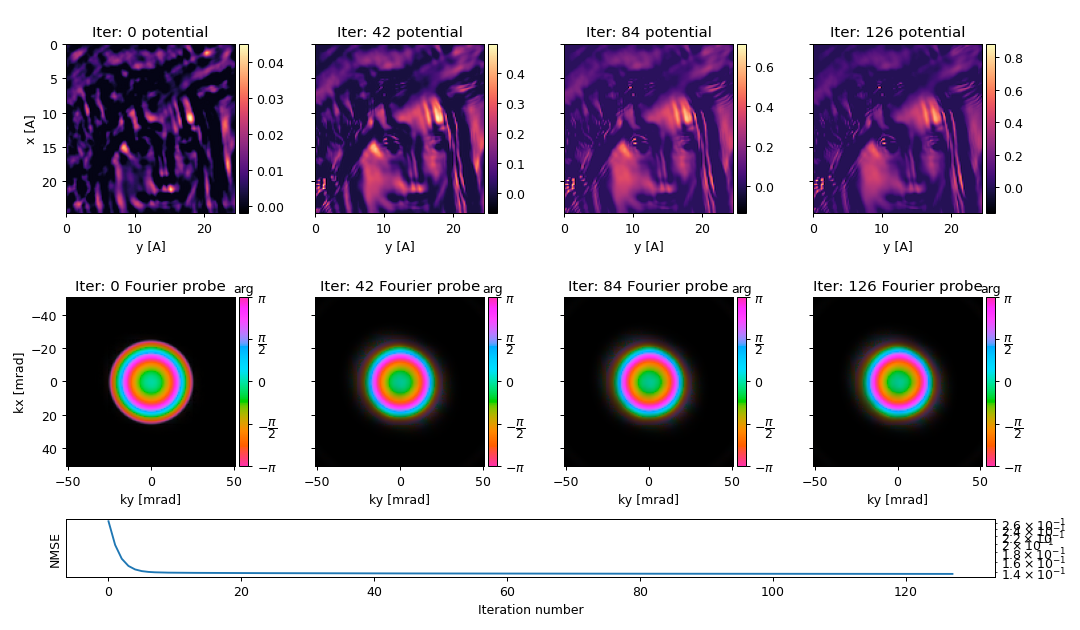

In [91]:
ptycho_18nm = ptycho_18nm.reconstruct(
    reset=True,
    store_iterations=True,
    max_iter = 128,
    step_size = 0.3568,
).visualize(
    iterations_grid = 'auto',
    plot_fourier_probe=True,
)
plt.show()

In [29]:
slice_thicknesses = 10
slice_thicknesses*7
ms_ptycho_18nm = py4DSTEM.process.phase.MultislicePtychographicReconstruction(
    datacube=dataset,
    num_slices=7,
    slice_thicknesses=slice_thicknesses,
    verbose=True,
    energy=300e3,
    defocus=-200,
    semiangle_cutoff=21.3,
    object_padding_px=(18,18),
    device='gpu',
).preprocess(
    plot_center_of_mass = False,
    plot_rotation=False,
)

Best fit rotation = 2 degrees.
No need to transpose diffraction intensities.


In [30]:
ms_ptycho_18nm = ms_ptycho_18nm.reconstruct(
    reset=True,
    store_iterations=True,
    max_iter = 32,
    identical_slices_iter= 0,
    step_size=0.5,
    max_batch_size=128,
).visualize(
    iterations_grid = 'auto',
)

Performing 32 iterations using a complex object type, with the gradient-descent algorithm, with normalization_min: 1 and step _size: 0.5, in batches of max 128 measurements.


Reconstructing object and probe: 100%|██████████████████████████████████████████████| 32/32 [01:02<00:00,  1.96s/ iter]


In [31]:
ms_ptycho_18nm.visualize()
plt.show()

In [32]:
ms_ptycho_18nm.show_slices()
plt.show()

In [7]:
ptycho = py4DSTEM.process.phase.SingleslicePtychographicReconstruction(
    datacube=dataset,
    verbose=True,
    energy=300e3,
    semiangle_cutoff=21.3,
    device='gpu',
).preprocess(
    plot_center_of_mass = False,
    force_com_rotation = False,
    force_com_transpose = False,
)
plt.show()

D:\anaconda\Lib\site-packages\py4DSTEM\process\phase\iterative_base_class.py:648: UserWarning: Best fit rotation forced to 0 degrees.
  warnings.warn(
D:\anaconda\Lib\site-packages\py4DSTEM\process\phase\iterative_base_class.py:662: UserWarning: Transpose of intensities forced to False.
  warnings.warn(


In [8]:
ptycho = ptycho.reconstruct(
    reset=True,
    progress_bar = True,
    store_iterations = True,
    max_iter = 30,
    #pure_phase_object_iter = 7,
    step_size = 0.9,
    #normalization_min = 0.2,
    #gaussian_filter_sigma = 0.25, # in A
).visualize(
    iterations_grid='auto',
)

Performing 30 iterations using a complex object type, with the gradient-descent algorithm, with normalization_min: 1.


Reconstructing object and probe: 100%|██████████████████████████████████████████████| 30/30 [02:00<00:00,  4.02s/ iter]


In [9]:
plt.show()